In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


## Import relevant libraries

In [29]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [30]:
# Ignore warnings
warnings.filterwarnings("ignore")

In [31]:
train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
test_1 = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')

In [32]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [33]:
train.drop('Id', axis=1, inplace=True)


In [34]:
test.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
test.drop('Id', axis=1, inplace=True)


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

In [37]:
train.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


## Exploratory Data Analysis

### Checking for missing values

In [38]:
train.isna().sum()

AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [39]:
### cheking for columns with missing values
train.columns[train.isna().sum() != 0]

Index(['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL'], dtype='object')

### Imputing missing values with  the median

In [40]:
import pandas as pd

# Assuming "df" is your DataFrame with missing values

# Impute missing values with median
train_filled = train.fillna(train.median())

# Display the DataFrame with filled values
train_filled.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [41]:
train_filled.isna().sum().head()

AB    0
AF    0
AH    0
AM    0
AR    0
dtype: int64

## Univariate Analysis

In [42]:
# Categorical data
train_filled.select_dtypes('object').columns.tolist()


['EJ']

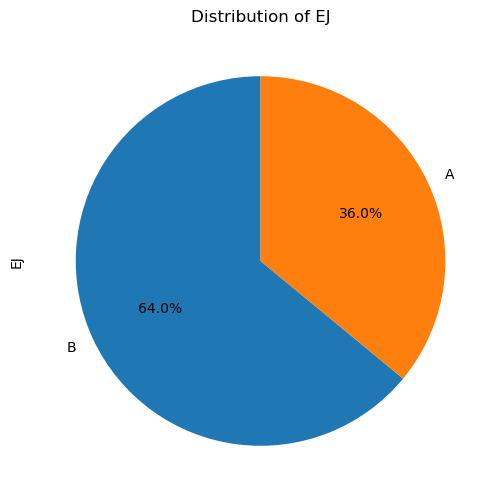

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming "train_filled" is your DataFrame and "EJ" is the categorical column

# Calculate the value counts of each category
category_counts = train_filled['EJ'].value_counts()

# Create a pie chart with percentage labels
plt.figure(figsize=(8, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of EJ')

# Display the pie chart
plt.show()


Ooops!!! we have imbalanced data

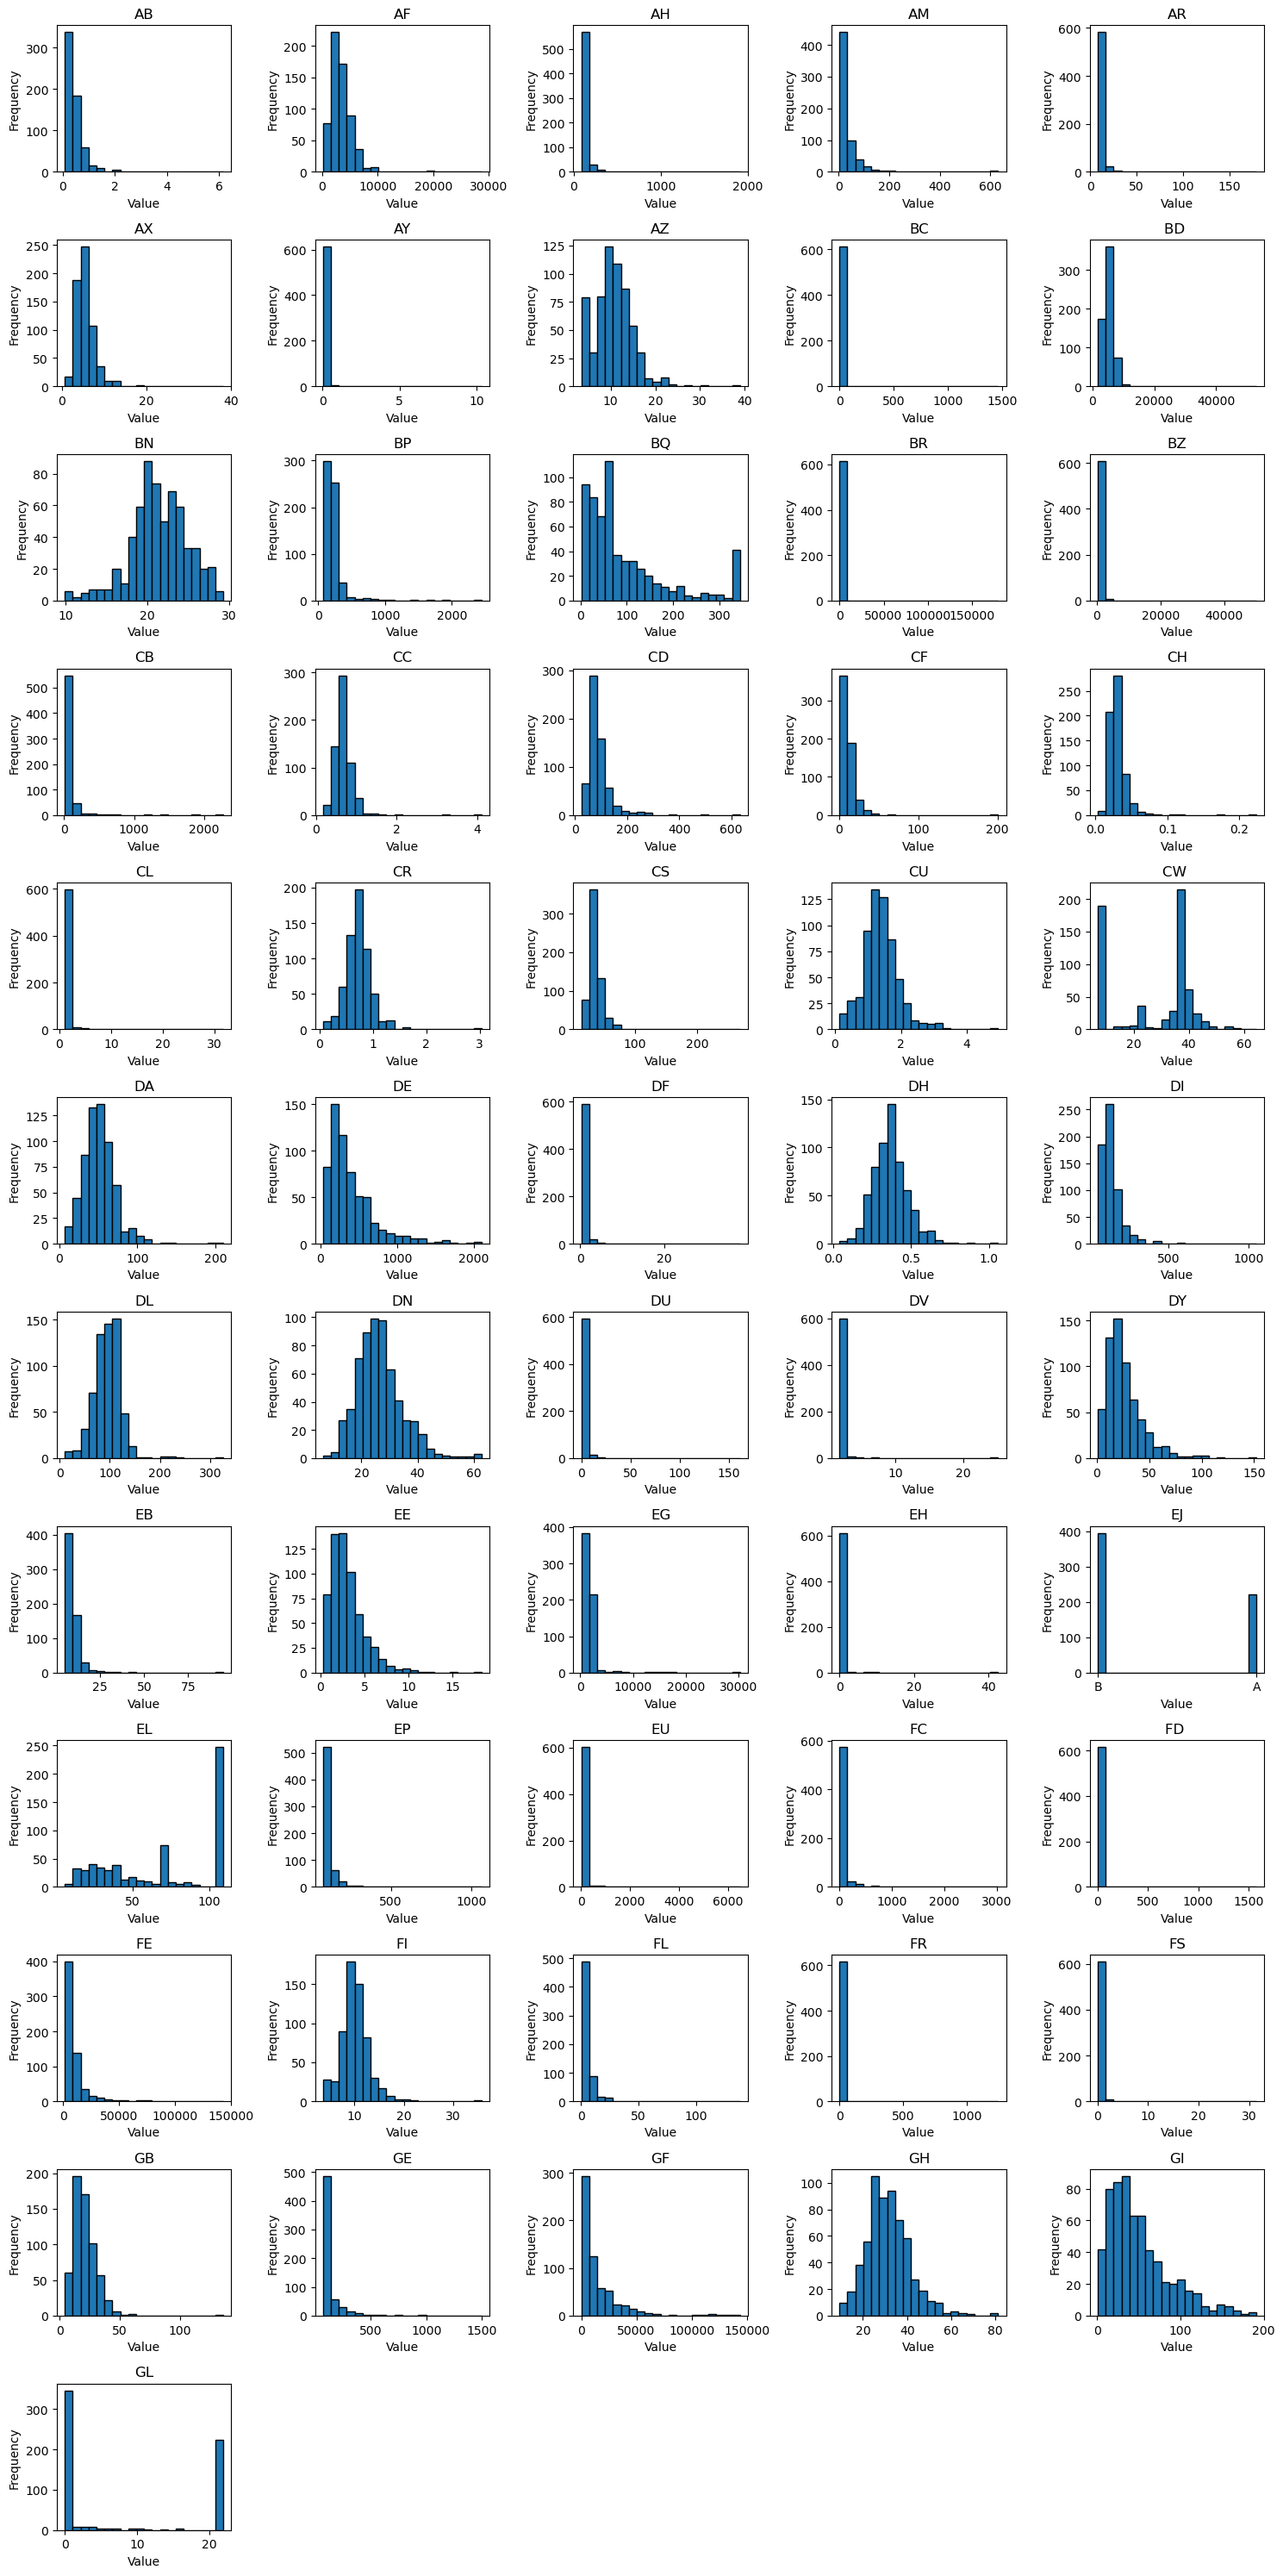

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Assuming "df" is your DataFrame with the 55 numerical columns

# Get the list of numerical column names
numerical_columns = train_filled.columns.tolist()
numerical_columns.pop()

# Calculate the number of rows and columns for subplots based on the number of numerical columns
num_cols = 5  # Adjust the number of columns based on your preference
num_rows = math.ceil(len(numerical_columns) / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through each numerical column
for i, column in enumerate(numerical_columns):
    # Select the axis for the current subplot
    ax = axes[i]
    
    # Create the distribution plot for the current column
    ax.hist(train_filled[column], bins=20, edgecolor='k')
    
    # Set the title and labels for the plot
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any extra subplots
for j in range(len(numerical_columns), len(axes)):
    axes[j].axis('off')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


## Bivariate Analysis

#### Dropping columns based on bivariate analysis

In [45]:
import pandas as pd

# Assuming "df" is your DataFrame with the features

# Calculate the correlation matrix
correlation_matrix = train_filled.corr()

# Set the correlation threshold
threshold = 0.7

# Find the columns to drop
columns_to_drop = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            column_name = correlation_matrix.columns[i]
            columns_to_drop.append(column_name)

# Drop the 
print(columns_to_drop)

train_filtered = train_filled.drop(columns=columns_to_drop)

# Print the remaining columns
train_filtered.columns
print('------------')
print(len(train_filtered.columns.tolist()))


['AR', 'BD ', 'BZ', 'CL', 'CS', 'DV', 'DV', 'DV', 'EB', 'EB', 'EH', 'EP', 'EP', 'EP', 'EP', 'FD ', 'FD ']
------------
47


In [46]:
test_filtered = test.drop(columns=columns_to_drop)


In [47]:
train_filtered.head()

,AB,AF,AH,AM,AX,AY,AZ,BC,BN,BP,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,0.699861,0.025578,9.812214,5.555634,22.5984,175.638726,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,0.145282,978.76416,85.200147,36.968889,3.632190,0.025578,13.517790,1.229900,19.4205,155.868030,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,0.470030,2635.10654,85.200147,32.360553,6.732840,0.025578,12.824570,1.229900,26.4825,128.988531,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,0.252107,3819.65177,120.201618,77.112203,3.685344,0.025578,11.053708,1.229900,23.6577,237.282264,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,0.380297,3733.04844,85.200147,14.103738,3.942255,0.054810,3.396778,102.151980,24.0108,324.546318,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [48]:
test_filtered.head()

,AB,AF,AH,AM,AX,AY,AZ,BC,BN,BP,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Numerical Encoding

In [49]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the unique values of the column and transform the column
train_filtered['EJ'] = label_encoder.fit_transform(train_filtered['EJ'])


In [50]:
test_filtered['EJ'] = label_encoder.fit_transform(test_filtered['EJ'])


## Feature importance using Random Forest

In [51]:
X = train_filtered.drop('Class', axis = 1)
y = train_filtered['Class']

In [52]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

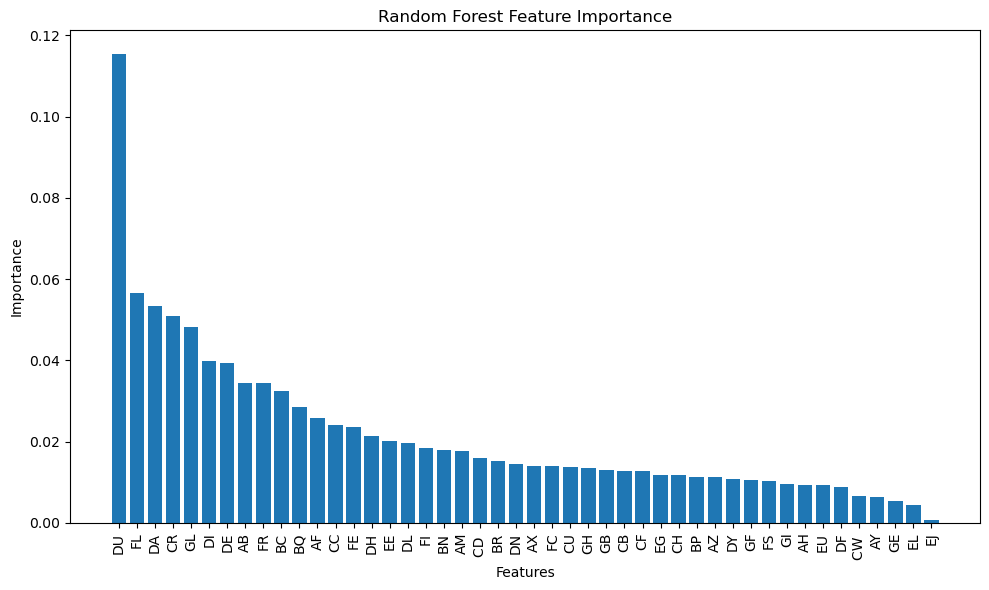

In [53]:
model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

In [60]:
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression




xgb_model = xgb.XGBClassifier()
adaboost_model = AdaBoostClassifier()
lgb_model = lgb.LGBMClassifier()
rf_model = RandomForestClassifier()
dtre_model = DecisionTreeClassifier()
lg_model = LogisticRegression()

# Create a list of tuples containing the name of the model and the corresponding trained model
base_models = [
    ('DecisionTree',dtre_model),
    ('RandomForest', rf_model),
    ('LogisticRegression', lg_model),
    ('XGBoost', xgb_model),
    ('AdaBoost', adaboost_model),
    ('LightGBM', lgb_model)
]

# Create a voting ensemble using hard voting (majority vote)
voting_ensemble_soft = VotingClassifier(estimators=base_models, voting='soft')

# Train the voting ensemble on the training data
voting_ensemble_soft.fit(X_train, y_train)

# Make probability predictions on the validation set
y_prob_pred = voting_ensemble_soft.predict_proba(X_test)

# Calculate the log loss of the ensemble on the validation set (using probabilities)
log_loss_score = log_loss(y_test, y_prob_pred)
print(f"Soft Voting Log Loss: {log_loss_score:.4f}")

Soft Voting Log Loss: 0.2483


In [61]:
y_pred = voting_ensemble_soft.predict_proba(X_test)
logloss = log_loss(y_test, y_pred[:, 1])
print(logloss) 

0.24831191684015871


In [62]:
pred_probs = voting_ensemble_soft.predict_proba(test_filtered)
data = {'Id': test_1.Id, 'class_0': 1-pred_probs[:, 0], 'class_1': pred_probs[:, 0]}
df = pd.DataFrame(data)
print(df.head())

             Id  class_0  class_1
0  00eed32682bb  0.48115  0.51885
1  010ebe33f668  0.48115  0.51885
2  02fa521e1838  0.48115  0.51885
3  040e15f562a2  0.48115  0.51885
4  046e85c7cc7f  0.48115  0.51885


In [63]:
df.to_csv('submission.csv', index=False)